# **Link to the dataset: https://drive.google.com/file/d/1EBY8LrGvbOyI_gDNgNIMa_L9zMz56y7H/view?usp=sharing**

<hr>

# **Step 1 - Importing the libraries**

**Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Classical Data Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [45]:
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

<hr>

# **Step 2 - Loading up the data and inspection**

**Data Loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/wind_data.csv")

**Data Inspection phase**

In [28]:
df.head().style.set_properties(
    **{
        "background-color": "teal",
        "border-color":"black",
        "border-style":"solid"
    }
)

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


**Shape Inspection**

In [ ]:
a = df.shape
print(f"Rows: {a[0]} & Columns: {a[1]}")

Rows: 909604 & Columns: 16


**Brief my data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

**Insights**
  * **The data has no null values as per the information, but timestamp column is not in proper format**
  * **The target column is Target, it's numerical in nature**
  * **The turbine_id and timestamp are not so relevant with respect to prediction (if Time series, then we can use timestamp)**

<hr>

**Statistical Analysis**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
active_power_calculated_by_converter,909604.0,525.886061,474.619576,0.000000,149.620898,379.989929,781.357475,1999.999858
active_power_raw,909604.0,537.639468,482.394907,0.000008,155.813244,383.985926,800.261108,1999.984456
ambient_temperature,909604.0,25.573921,8.025649,5.616541,17.093680,27.919035,32.171696,48.089017
generator_speed,909604.0,931.130882,193.674384,0.000000,770.538574,884.068502,1123.335856,1267.140625
generator_winding_temp_max,909604.0,60.730112,9.721582,25.636366,54.916767,60.034490,65.737187,129.846405
grid_power10min_average,909604.0,527.579537,472.656976,0.000000,147.181552,391.303187,794.875710,1999.991455
nc1_inside_temp,909604.0,31.755823,3.929794,11.141922,29.913803,31.762946,33.469745,52.790030
nacelle_temp,909604.0,31.686413,3.554426,16.010218,30.267423,31.961610,33.546260,48.406106
reactice_power_calculated_by_converter,909604.0,111.080610,78.219944,-318.393721,81.540850,92.005826,124.879153,523.892695
reactive_power,909604.0,133.692333,91.232152,-5.461607,96.045765,107.633378,154.153730,592.815938


<Axes: xlabel='Target', ylabel='Density'>

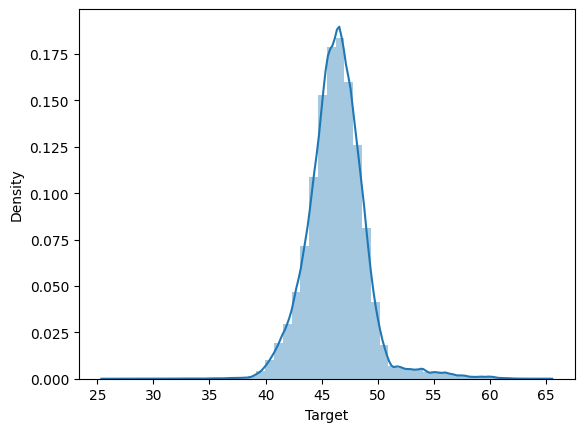

In [ ]:
sns.distplot(df["Target"])

<hr>

# **Step 3 - Data Preprocessing or Wrangling**

**Null Check**

In [ ]:
df.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

**Duplicates**

In [ ]:
df.duplicated().sum()

0

**Outliers Detection**

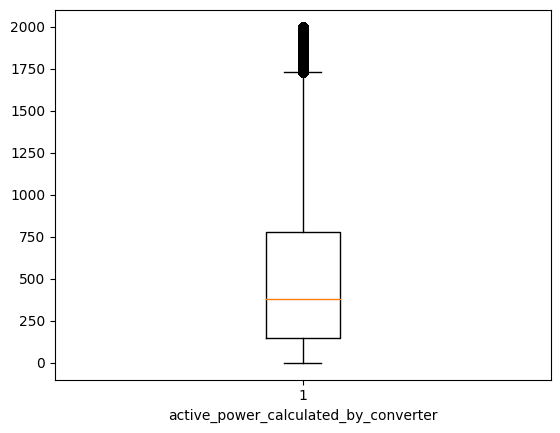

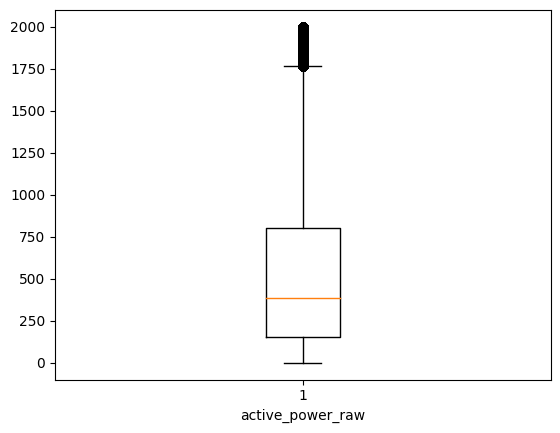

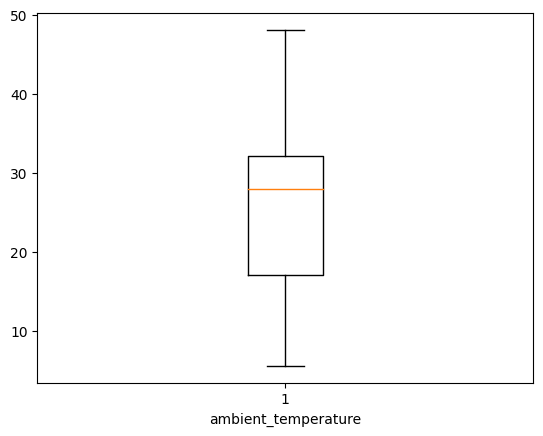

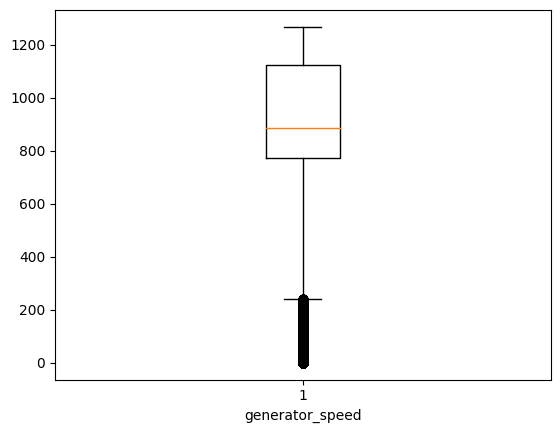

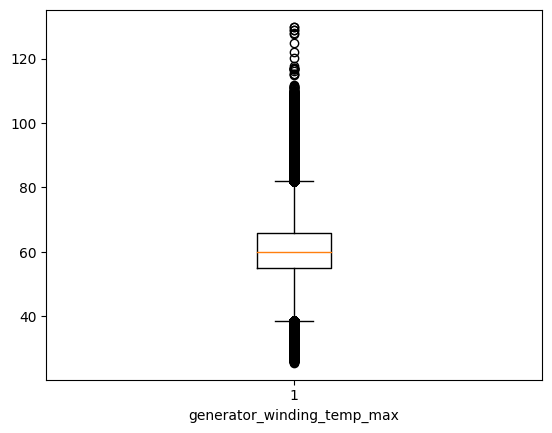

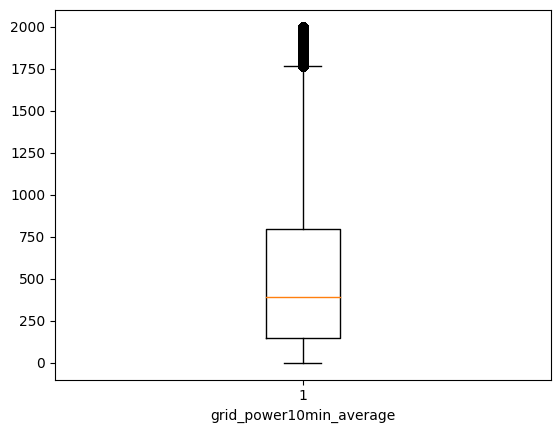

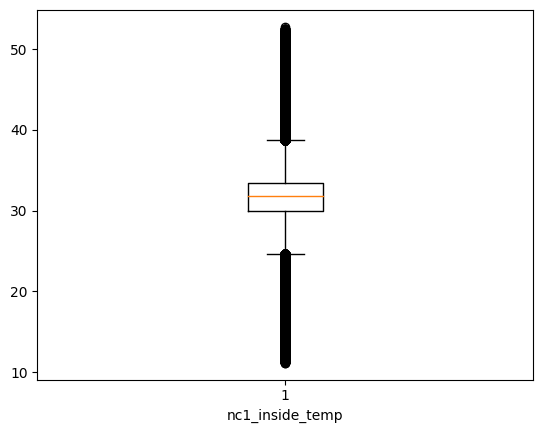

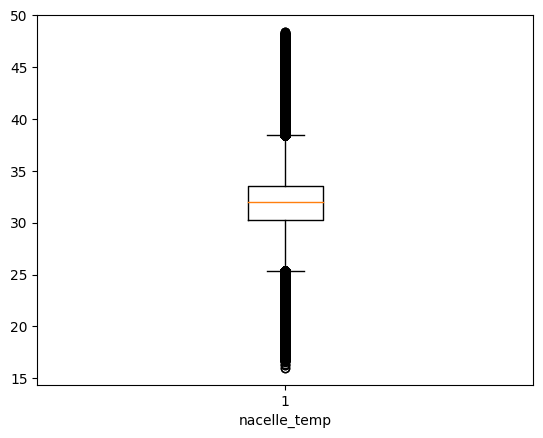

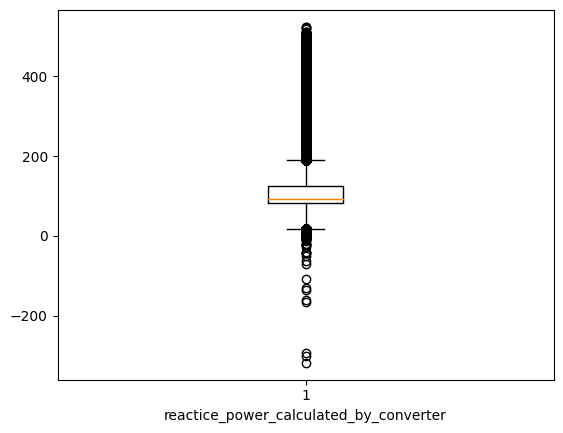

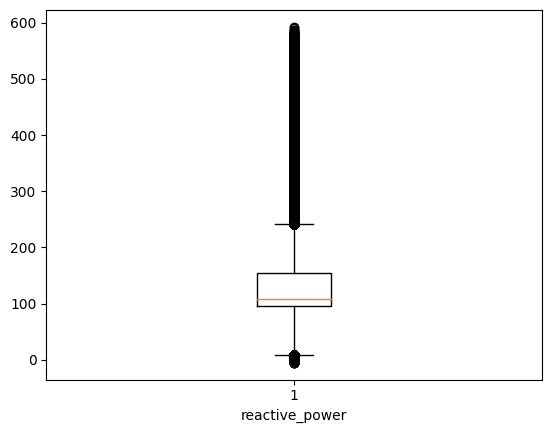

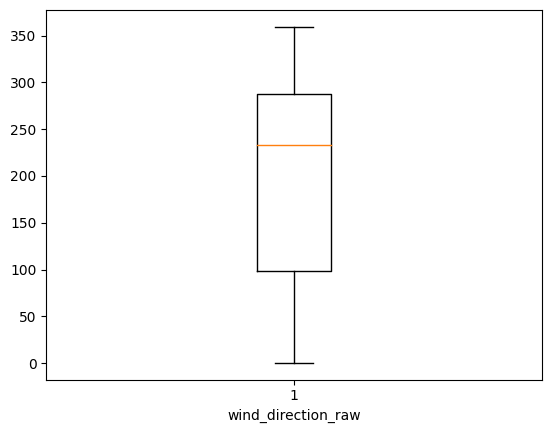

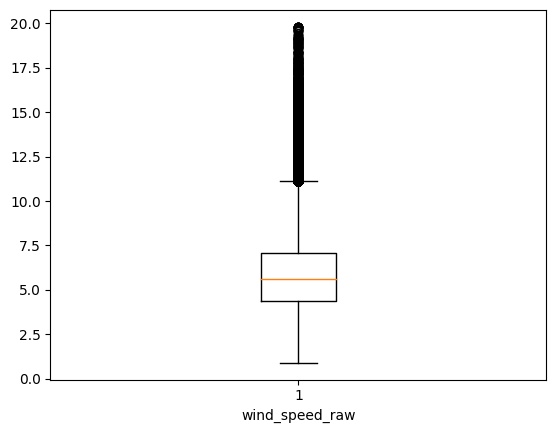

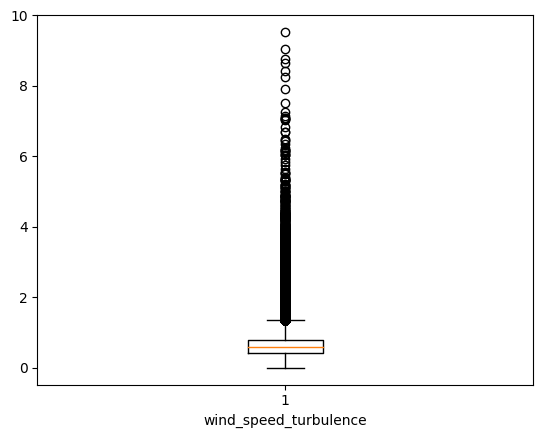

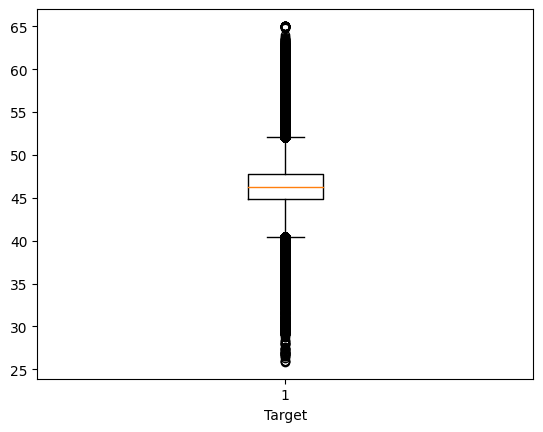

In [ ]:
for x in df.columns:
  if df[x].dtype != "object":
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.show()

In [22]:
df_copy = df.copy()

**Elimination of Outliers**

In [23]:
df_copy.shape

(909604, 16)

In [24]:
for x in df_copy.columns:
  if df_copy[x].dtype != "object":
    # Calculate the Q1, and Q3
    Q1 = df_copy[x].quantile(0.25)
    Q3 = df_copy[x].quantile(0.75)

    # Defining IQR
    IQR = Q3 - Q1

    # Define the Upper and Lower Fence
    LF = Q1 - 1.5 * IQR
    UF = Q3 + 1.5 * IQR

    # Formulation
    df_copy = df_copy[(df_copy[x] >= LF) & (df_copy[x]<= UF)]

In [25]:
df_copy.shape

(497528, 16)

<hr>

# **Step 4 - EDA**

* **How the power is acting with respect to time**

**Convert this timestamp into time object**

In [32]:
df_copy["timestamp"] = pd.to_datetime(df_copy["timestamp"])

In [33]:
df_copy.index = df_copy.set_index(df_copy["timestamp"])

**Visualize**

<hr>

# **Step 5 - Feature Scaling**

**Initialize**

In [41]:
# initialize the object for scaler
scaler = StandardScaler()

**Before standardizing we need to bifurcate the feature and the target columns**

In [42]:
# Feature Columns
X = df.drop(["turbine_id", "timestamp", "Target"], axis = 1)

# Target Columns
Y = df["Target"]

**Scaling the values**

In [43]:
X = scaler.fit_transform(X)

<hr>

# **Step 6 - Reduce the data-complexity**

In [46]:
# initialize the object of PCA
pca = PCA(n_components = 0.95)

In [47]:
pca_data = pca.fit_transform(X)

In [48]:
pca_data.shape

(909604, 7)

In [50]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6
0,1.677274,0.330386,0.274303,-0.790720,-1.000739,0.359201,-0.413761
1,-0.593959,-0.306606,1.410909,1.159831,-0.405633,-0.179048,-0.397918
2,4.031848,-6.190135,-0.591438,-1.832399,0.409844,-0.790188,0.103882
3,-2.715778,0.302205,-0.968835,0.423444,0.809260,0.981932,1.060612
4,0.562806,0.357439,0.545970,-0.723757,-1.457427,0.003791,-0.020135
...,...,...,...,...,...,...,...
909599,3.156614,1.577054,-0.389591,-0.665949,0.470244,-0.664960,-1.240516
909600,-1.963339,-0.413626,-1.040631,-0.465985,0.402914,-0.335999,0.480738
909601,1.802108,0.453670,0.051951,-0.899072,0.473143,1.410836,-1.605279
909602,-2.186589,0.022413,-1.551523,-0.190128,-0.663333,-0.512325,0.354293


<hr>

# **Step 7 - Modelling Phase**

**Splitting the data**

In [51]:
x_train, x_test, y_train, y_test = train_test_split(pca_data, Y, test_size = 0.25, random_state = 30)

**Linear Regression**

In [52]:
# initialize the model
lr_model = LinearRegression()

In [53]:
# Fitting the data
lr_model.fit(x_train, y_train)

LinearRegression()

In [55]:
# Predict
pred = lr_model.predict(x_test)

**Helper function for evaluation**

In [59]:
def evaluation(y_test_values, prediction_values):
  mse = mean_squared_error(y_test_values, prediction_values)
  print(f"MSE: {mse}")
  rmse = np.sqrt(mse)
  print(f"RMSE: {rmse}")
  r2 = r2_score(y_test_values, prediction_values)
  print(f"R2_Score: {r2}")
  mape = mean_absolute_percentage_error(y_test_values, prediction_values)
  print(f"MAPE: {mape}")

**Evaluation of LR**

In [60]:
evaluation(y_test, pred)

MSE: 4.152671591367057
RMSE: 2.0378104895615436
R2_Score: 0.39266396456141694
MAPE: 0.03086175326773496


<hr>

**Decision Tree Regressor**

In [61]:
model_DT = DecisionTreeRegressor()

In [62]:
# Fitting the data
model_DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [63]:
# Predict
pred = model_DT.predict(x_test)

In [64]:
evaluation(y_test, pred)

MSE: 4.747060514876429
RMSE: 2.178775003270514
R2_Score: 0.3057334658763644
MAPE: 0.02868403621157853


**For the random Forest**

In [ ]:
model_RF = RandomForestRegressor()

model_RF.fit(x_train, y_train)
# Predict
pred = model_RF.predict(x_test)